Check model parameters and size

In [13]:
from torchsummary import summary
import torch
model = torch.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/model_couple_off[64, 128, 256]_on[16, 128, 128]_epoch_199_1773.pt",map_location=torch.device('cpu'))
model.eval()

summary(model,[(5,480),(224124,1),(948,1300)]) #SR

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 64, 480]           1,024
         LeakyReLU-2              [-1, 64, 480]               0
         MaxPool1d-3              [-1, 64, 240]               0
            Conv1d-4             [-1, 128, 240]          24,704
         LeakyReLU-5             [-1, 128, 240]               0
         MaxPool1d-6             [-1, 128, 120]               0
            Conv1d-7             [-1, 256, 120]          98,560
         LeakyReLU-8             [-1, 256, 120]               0
         MaxPool1d-9              [-1, 256, 60]               0
          Flatten-10                [-1, 15360]               0
           Linear-11                   [-1, 64]         983,104
           Conv2d-12         [-1, 16, 474, 650]             160
        LeakyReLU-13         [-1, 16, 474, 650]               0
        MaxPool2d-14         [-1, 16, 2

Compare the training loss for direct training and coupling pretrained components

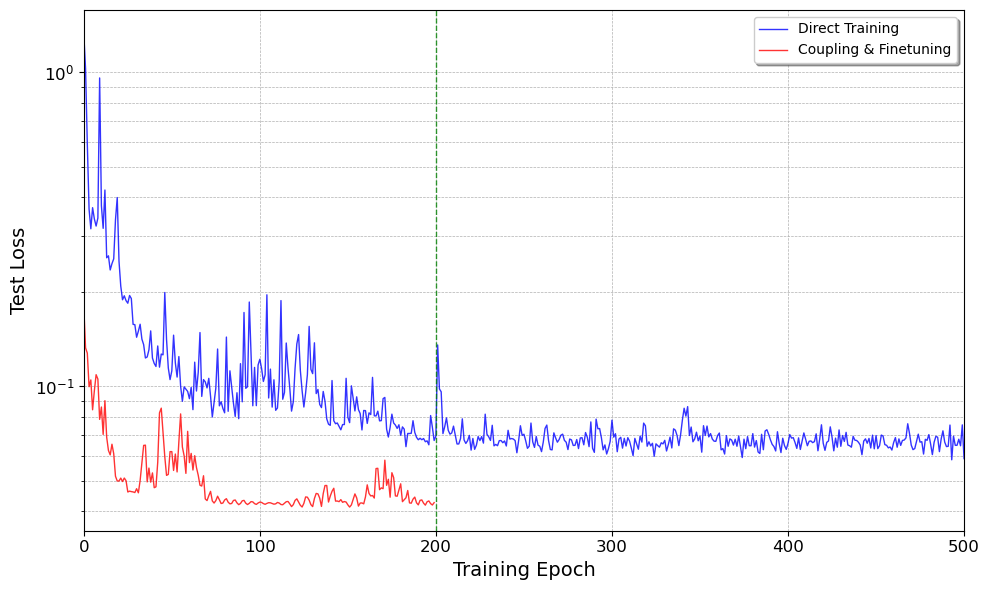

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data for demonstration
direct_loss = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/test_loss_direct_1658.npy")
couple_loss = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/test_loss_couple_1658.npy")


# Plotting the graph with enhanced styling
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(direct_loss, label='Direct Training', color='blue', linestyle='-', linewidth=1, alpha=0.8)
plt.plot(couple_loss, label='Coupling & Finetuning', color='red', linestyle='-', linewidth=1, alpha=0.8)
plt.axvline(x=200, color='green', linestyle='--', linewidth=1, alpha=0.8)  # Adding vertical line for early stopping epoch

# Adding legend with shadow
plt.legend(shadow=True)

# Setting x-axis and y-axis labels with larger fonts
plt.xlabel('Training Epoch', fontsize=14)
plt.ylabel('Test Loss', fontsize=14)

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Setting x-axis and y-axis ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Setting x-axis limit and scaling y-axis to logarithmic
plt.xlim(0, 500)
plt.yscale('log')

# Adjusting layout to prevent clipping of labels
plt.tight_layout()
plt.savefig('./plots/pretrain_CT.png', dpi=600, bbox_inches='tight')
plt.show()



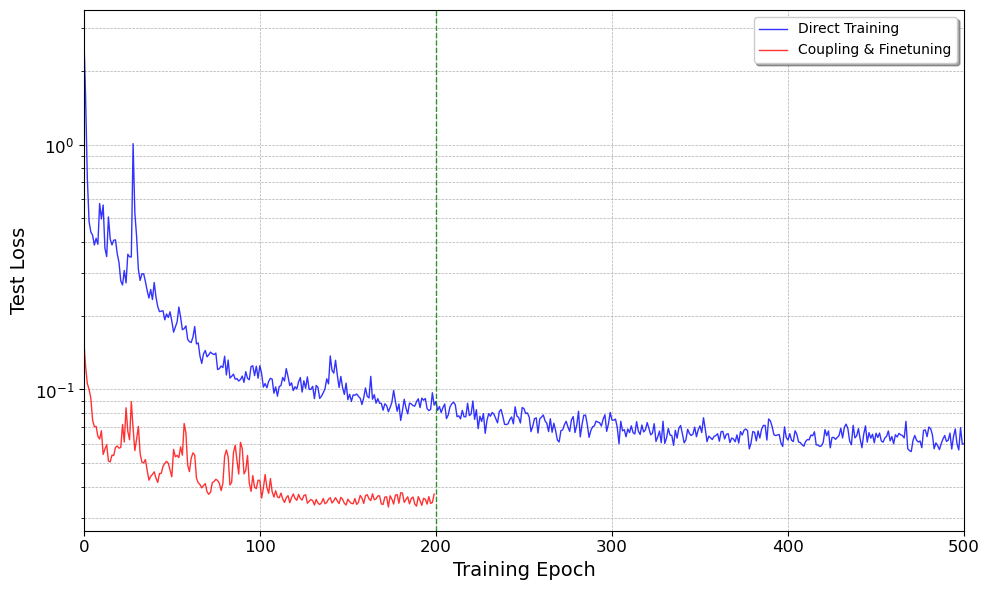

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data for demonstration
direct_loss = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/test_loss_direct_1773.npy")
couple_loss = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/test_loss_couple_1773.npy")


# Plotting the graph with enhanced styling
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(direct_loss, label='Direct Training', color='blue', linestyle='-', linewidth=1, alpha=0.8)
plt.plot(couple_loss, label='Coupling & Finetuning', color='red', linestyle='-', linewidth=1, alpha=0.8)
plt.axvline(x=200, color='green', linestyle='--', linewidth=1, alpha=0.8)  # Adding vertical line for early stopping epoch

# Adding legend with shadow
plt.legend(shadow=True)

# Setting x-axis and y-axis labels with larger fonts
plt.xlabel('Training Epoch', fontsize=14)
plt.ylabel('Test Loss', fontsize=14)

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Setting x-axis and y-axis ticks font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Setting x-axis limit and scaling y-axis to logarithmic
plt.xlim(0, 500)
plt.yscale('log')

# Adjusting layout to prevent clipping of labels
plt.tight_layout()
plt.savefig('./plots/pretrain_SR.png', dpi=600, bbox_inches='tight')
plt.show()


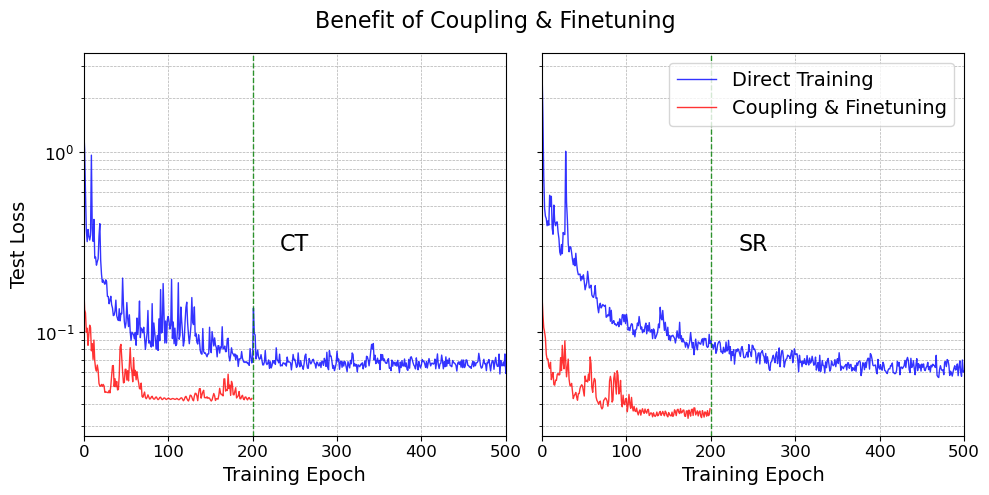

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data for demonstration
direct_loss_sr = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/test_loss_direct_1773.npy")
couple_loss_sr = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/SR/out/test_loss_couple_1773.npy")
direct_loss_ct = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/test_loss_direct_1658.npy")
couple_loss_ct = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/test_loss_couple_1658.npy")

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)  # Setting sharey=True for common y-axis
fig.suptitle('Benefit of Coupling & Finetuning', fontsize=16)  # Adding title to the figure

# Plotting the graph for CT with enhanced styling
axs[0].plot(direct_loss_ct, label='Direct Training', color='blue', linestyle='-', linewidth=1, alpha=0.8)
axs[0].plot(couple_loss_ct, label='Coupling & Finetuning', color='red', linestyle='-', linewidth=1, alpha=0.8)
axs[0].text(0.5, 0.5, 'CT', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes, fontsize=16)  # Adding text to the graph
axs[0].axvline(x=200, color='green', linestyle='--', linewidth=1, alpha=0.8)  # Adding vertical line for early stopping epoch
axs[0].set_xlabel('Training Epoch', fontsize=14)
axs[0].set_ylabel('Test Loss', fontsize=14)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].set_xlim(0, 500)
axs[0].set_yscale('log')

# Plotting the graph for SR with enhanced styling
axs[1].plot(direct_loss_sr, label='Direct Training', color='blue', linestyle='-', linewidth=1, alpha=0.8)
axs[1].plot(couple_loss_sr, label='Coupling & Finetuning', color='red', linestyle='-', linewidth=1, alpha=0.8)
axs[1].text(0.5, 0.5, 'SR', horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes, fontsize=16)  # Adding text to the graph
axs[1].axvline(x=200, color='green', linestyle='--', linewidth=1, alpha=0.8)  # Adding vertical line for early stopping epoch
axs[1].legend(fontsize =14)  # Adding legend with shadow
axs[1].set_xlabel('Training Epoch', fontsize=14)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].set_xlim(0, 500)
axs[1].set_yscale('log')

# Adjusting layout to prevent clipping of labels
plt.tight_layout()
plt.savefig('./plots/pretrain_SR_CT.png', dpi=600, bbox_inches='tight')
plt.show()
